In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq,train_target,epochs=100
                    ,batch_size=64, validation_data=(val_seq, val_target)
                    ,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6929 - accuracy: 0.5114 - val_loss: 0.6916 - val_accuracy: 0.5734
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6912 - accuracy: 0.5804 - val_loss: 0.6889 - val_accuracy: 0.6176
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6875 - accuracy: 0.6313 - val_loss: 0.6825 - val_accuracy: 0.6464
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6778 - accuracy: 0.6629 - val_loss: 0.6584 - val_accuracy: 0.6886
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6329 - accuracy: 0.7063 - val_loss: 0.5878 - val_accuracy: 0.7260
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5750 - accuracy: 0.7369 - val_loss: 0.5638 - val_accuracy: 0.7380
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5497 - accuracy: 0.7553 - val_loss: 0.5446 - val_ac

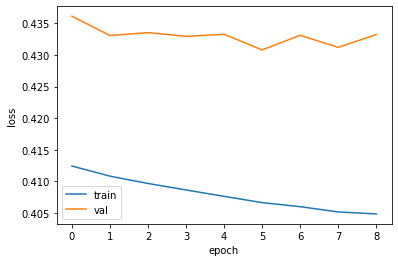

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100
                    ,batch_size=64, validation_data=(val_seq, val_target)
                    ,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6929 - accuracy: 0.5098 - val_loss: 0.6917 - val_accuracy: 0.5918
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6907 - accuracy: 0.6037 - val_loss: 0.6869 - val_accuracy: 0.6520
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6814 - accuracy: 0.6675 - val_loss: 0.6503 - val_accuracy: 0.7040
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6387 - accuracy: 0.6983 - val_loss: 0.6195 - val_accuracy: 0.7008
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6165 - accuracy: 0.7032 - val_loss: 0.6009 - val_accuracy: 0.7156
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5958 - accuracy: 0.7238 - val_loss: 0.5814 - val_accuracy: 0.7344
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.5796 - accuracy: 0.7343 - val_loss: 0.5647 - val_ac

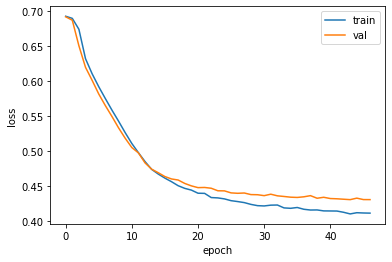

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model3 =keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_9 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq,train_target,epochs=100
                    ,batch_size=64, validation_data=(val_seq, val_target)
                    ,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 71ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6930 - val_accuracy: 0.4932
Epoch 2/100
313/313 [==============================] - 21s 69ms/step - loss: 0.6925 - accuracy: 0.5220 - val_loss: 0.6901 - val_accuracy: 0.5778
Epoch 3/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6819 - accuracy: 0.6114 - val_loss: 0.6398 - val_accuracy: 0.6850
Epoch 4/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6330 - accuracy: 0.6832 - val_loss: 0.5985 - val_accuracy: 0.7150
Epoch 5/100
313/313 [==============================] - 22s 69ms/step - loss: 0.5875 - accuracy: 0.7211 - val_loss: 0.5618 - val_accuracy: 0.7458
Epoch 6/100
313/313 [==============================] - 21s 69ms/step - loss: 0.5558 - accuracy: 0.7457 - val_loss: 0.5372 - val_accuracy: 0.7616
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5374 - accuracy: 0.7518 - val_loss: 0.5231 - val_ac

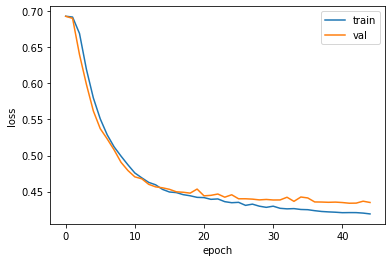

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq,train_target,epochs=100
                    ,batch_size=64, validation_data=(val_seq, val_target)
                    ,callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 11ms/step - loss: 0.4107 - accuracy: 0.8170 - val_loss: 0.4384 - val_accuracy: 0.7990
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4157 - accuracy: 0.8125 - val_loss: 0.4373 - val_accuracy: 0.7984
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4039 - accuracy: 0.8209 - val_loss: 0.4375 - val_accuracy: 0.7970
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4116 - accuracy: 0.8148 - val_loss: 0.4379 - val_accuracy: 0.7964
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4102 - accuracy: 0.8171 - val_loss: 0.4385 - val_accuracy: 0.7932


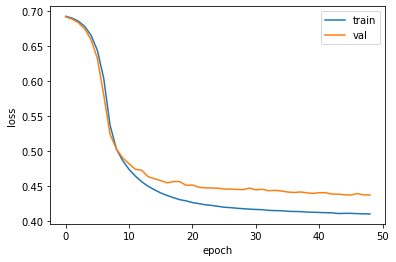

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
test_seq = pad_sequences(test_input,maxlen=100)
rnn_model = keras.models.load_model('best-gru-model.h5')
rnn_model.evaluate(test_seq,test_target)

OSError: ignored

In [5]:
# import set
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [68]:
data = pd.read_csv('A104040.csv')

In [69]:
data.describe()

,day,cur_pr,high_pr,low_pr,clo_pr,pr_diff,acc_vol,for_stor,for_stor_diff,for,com_buy_vol,oot_cur_pr,oot_high_pr,oot_low_pr,oot_clo_pr,oot_pr_diff,oot_vol
count,3.007000e+03,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3.007000e+03,3.007000e+03,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3.007000e+03
mean,2.014687e+07,3957.226139,4073.398404,3851.909544,3948.313602,102.498836,1.467981e+06,1.835720e+05,-29.293981,0.901603,-352.798803,3951.228799,3962.481211,3941.506817,3950.806452,2.492850,2.163344e+04
std,3.524110e+04,3274.623676,3416.928864,3181.359799,3284.109026,204.070037,6.357972e+06,2.753655e+05,64209.664252,0.981706,18641.130733,3284.048768,3300.170083,3263.643364,3278.505529,79.057408,1.530394e+05
min,2.009012e+07,593.000000,626.000000,577.000000,586.000000,0.000000,0.000000e+00,0.000000e+00,-620080.000000,0.000000,-432152.000000,586.000000,586.000000,586.000000,586.000000,-1000.000000,0.000000e+00
25%,2.012012e+07,2095.000000,2167.500000,2035.000000,2092.500000,15.000000,1.391400e+04,1.373000e+03,-1229.000000,0.020000,0.000000,2095.000000,2102.500000,2080.000000,2090.000000,0.000000,0.000000e+00
50%,2.015021e+07,3370.000000,3445.000000,3260.000000,3340.000000,45.000000,7.728700e+04,5.121000e+04,0.000000,0.600000,0.000000,3340.000000,3355.000000,3340.000000,3350.000000,0.000000,2.600000e+01
75%,2.018030e+07,4555.000000,4647.500000,4455.000000,4530.000000,100.000000,6.176865e+05,2.460925e+05,1612.000000,1.435000,0.000000,4535.000000,4550.000000,4530.000000,4550.000000,0.000000,3.665500e+03
max,2.021032e+07,25500.000000,27500.000000,25250.000000,25800.000000,3750.000000,1.055487e+08,1.261060e+06,520377.000000,4.090000,309965.000000,25800.000000,25900.000000,25500.000000,25500.000000,2150.000000,4.396095e+06


In [70]:
data['day']=pd.to_datetime(data['day'],format='%Y%m%d')
#datetime으로 변환하기.
data['year']=data['day'].dt.year
data['month']=data['day'].dt.month
data['date']=data['day'].dt.day

Text(0, 0.5, 'price')

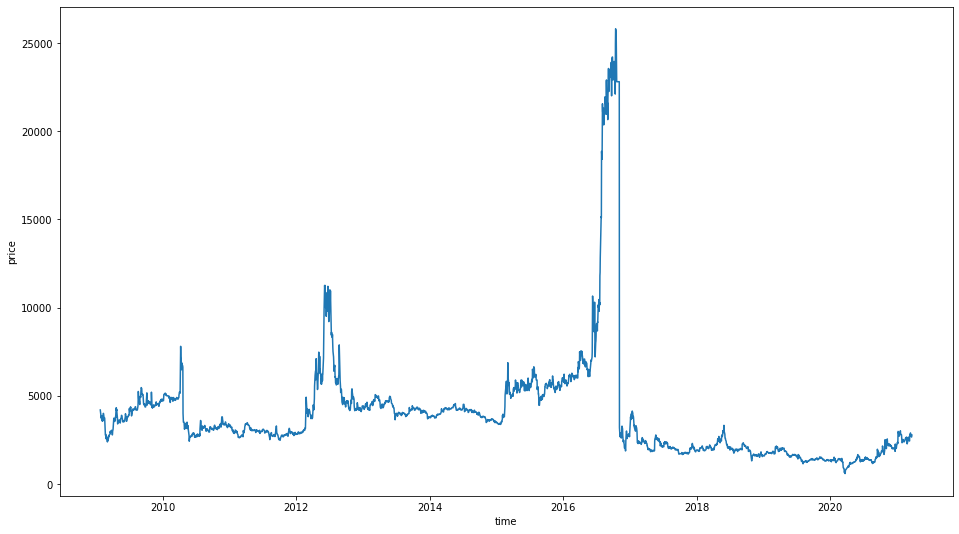

In [71]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.lineplot(y=data['clo_pr'],x=data['day'])
plt.xlabel('time')
plt.ylabel('price')

In [72]:

scaler = MinMaxScaler()
scale_cols =['cur_pr',	'high_pr',	'low_pr',	'clo_pr',	'pr_diff',	'acc_vol']

In [73]:
data_scaled = scaler.fit_transform(data[scale_cols])
data_scaled

array([[0.08459469, 0.0846171 , 0.08280306, 0.08661855, 0.012     ,
        0.0986444 ],
       [0.08318946, 0.07940761, 0.08462692, 0.08483382, 0.01866667,
        0.02993105],
       [0.0841932 , 0.07791918, 0.08401897, 0.08205759, 0.012     ,
        0.01271561],
       ...,
       [0.13076645, 0.13671206, 0.12981802, 0.12925359, 0.028     ,
        0.01043868],
       [0.14562171, 0.13429337, 0.12698091, 0.12508924, 0.12      ,
        0.00886492],
       [0.15666279, 0.16313165, 0.13366838, 0.14293646, 0.08133333,
        0.03121152]])

In [74]:
data_scaled=pd.DataFrame(data_scaled)


In [75]:
data_scaled.columns = scale_cols

In [76]:
print(data_scaled)

        cur_pr   high_pr    low_pr    clo_pr   pr_diff   acc_vol
0     0.084595  0.084617  0.082803  0.086619  0.012000  0.098644
1     0.083189  0.079408  0.084627  0.084834  0.018667  0.029931
2     0.084193  0.077919  0.084019  0.082058  0.012000  0.012716
3     0.082386  0.077919  0.083614  0.083842  0.010667  0.019817
4     0.085598  0.081454  0.086045  0.085429  0.004000  0.051095
...        ...       ...       ...       ...       ...       ...
3002  0.125547  0.120339  0.122523  0.119537  0.021333  0.001845
3003  0.124744  0.119967  0.124549  0.122710  0.044000  0.002958
3004  0.130766  0.136712  0.129818  0.129254  0.028000  0.010439
3005  0.145622  0.134293  0.126981  0.125089  0.120000  0.008865
3006  0.156663  0.163132  0.133668  0.142936  0.081333  0.031212

[3007 rows x 6 columns]


In [77]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [78]:
window_size=20
TEST_SIZE = 200

In [79]:
# 트레인을 200일 전까지 테스트를 마지막 200개로 나눴다.
train = data_scaled[:-TEST_SIZE]
test  = data_scaled[-TEST_SIZE:]

In [80]:
train.head(50)

,cur_pr,high_pr,low_pr,clo_pr,pr_diff,acc_vol
0,0.084595,0.084617,0.082803,0.086619,0.012000,0.098644
1,0.083189,0.079408,0.084627,0.084834,0.018667,0.029931
2,0.084193,0.077919,0.084019,0.082058,0.012000,0.012716
3,0.082386,0.077919,0.083614,0.083842,0.010667,0.019817
4,0.085598,0.081454,0.086045,0.085429,0.004000,0.051095
5,0.091019,0.085733,0.087059,0.084834,0.044000,0.077345
6,0.090416,0.092431,0.090301,0.091378,0.037333,0.429002
7,0.086201,0.081640,0.085438,0.085825,0.005333,0.108979
8,0.076565,0.086292,0.077939,0.086619,0.089333,0.649327
9,0.073353,0.069733,0.074697,0.073332,0.001333,0.008439


In [81]:
test.head(5)

,cur_pr,high_pr,low_pr,clo_pr,pr_diff,acc_vol
2807,0.153250,0.141363,0.150894,0.147299,0.028000,0.000161
2808,0.149837,0.141549,0.149475,0.151463,0.021333,0.000216
2809,0.149637,0.140805,0.146841,0.148291,0.025333,0.000783
2810,0.176737,0.173179,0.155757,0.152058,0.208000,0.005928
2811,0.164492,0.170202,0.163863,0.182994,0.178667,0.002554


In [82]:
feature_cols = \
['cur_pr',	'high_pr',	'low_pr','acc_vol']
label_cols=['clo_pr']

In [83]:
train_feature = train[feature_cols]
train_label = train[label_cols]

In [84]:
#train dataset

train_feature, train_label = make_dataset(train_feature, train_label)

In [85]:
train_feature.shape

(2787, 20, 4)

In [86]:
x_train,x_valid,y_train,y_valid = train_test_split(train_feature,train_label, test_size=0.2)

In [87]:
x_train.shape

(2229, 20, 4)

In [88]:
# test dataset feature/label 분리

test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset 만들기
test_feature, test_label = make_dataset(test_feature, test_label, 20)

In [89]:
test_feature.shape, test_label.shape


((180, 20, 4), (180, 1))

In [90]:
#Keras를 활용한 lstm 모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [91]:
model = Sequential()
model.add(LSTM(16,
                input_shape =(train_feature.shape[1],train_feature.shape[2]),
                activation='relu',
                return_sequences =False))

In [92]:
model.add(Dense(1))

In [93]:
import os
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('./','tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1,save_best_only=True,mode='auto')


In [ ]:
history = model.fit(x_train,y_train,
                    epochs= 200,
                    batch_size = 16,
                    validation_data=(x_valid,y_valid),
                    callbacks=[early_stop,checkpoint])

Epoch 1/200
140/140 [==============================] - 5s 29ms/step - loss: 0.0059 - val_loss: 0.0012

Epoch 00001: val_loss improved from inf to 0.00121, saving model to ./tmp_checkpoint.h5
Epoch 2/200
140/140 [==============================] - 4s 28ms/step - loss: 9.3179e-04 - val_loss: 9.6351e-04

Epoch 00002: val_loss improved from 0.00121 to 0.00096, saving model to ./tmp_checkpoint.h5
Epoch 3/200
140/140 [==============================] - 4s 28ms/step - loss: 8.2068e-04 - val_loss: 0.0010

Epoch 00003: val_loss did not improve from 0.00096
Epoch 4/200
140/140 [==============================] - 4s 29ms/step - loss: 0.0013 - val_loss: 8.0581e-04

Epoch 00004: val_loss improved from 0.00096 to 0.00081, saving model to ./tmp_checkpoint.h5
Epoch 5/200
140/140 [==============================] - 4s 28ms/step - loss: 6.0706e-04 - val_loss: 7.4381e-04

Epoch 00005: val_loss improved from 0.00081 to 0.00074, saving model to ./tmp_checkpoint.h5
Epoch 6/200
140/140 [=========================

In [ ]:
#weight 로딩 return 따로 안함. 모델의 가중치를 로드한다.
model.load_weights(filename)

In [ ]:
#예측하기 - 리턴 없음. 테스트용 로딩예측하기 - 리턴 없음. 테스트용 로딩
pred =model.predict(test_feature)

In [ ]:
# 데이터 예측하기. 실제데이터와 비교해본다.
# 테스트의 feature을 넣어주고 값을 예측한 pred는 예상치이며, test_label이 실제 값이다.
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual' )
plt.plot(pred, label='prediction')
plt.legend()
plt.show()